In [1]:
import pandas as pd
# For train/test split using professor id 
from sklearn.model_selection import GroupShuffleSplit 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.svm import SVC

## Cleaning Data

In [2]:
ratings_csv = pd.read_csv("MSU_ratings.csv")
ratings_csv

,prof_id,course,date,quality,difficulty,comments,thumbs_up,thumbs_down
0,790,MTH132,"Oct 9th, 2019",3.0,4.0,"Prof. Sagan is a nice, caring man, but he is n...",0,0
1,790,MTH317H,"Jan 3rd, 2014",5.0,3.0,AWESOME PROFESSOR!!!!!!!!!,0,0
2,790,MTH317H,"Nov 5th, 2013",5.0,4.0,Professor Sagan is really good math teacher. ...,0,0
3,790,MTH132,"Jan 11th, 2009",5.0,2.0,Excellent professor that was very clear in tea...,0,0
4,790,MATH254H,"Aug 10th, 2005",4.5,3.0,Awesome - made me want to become a Math major ...,0,0
...,...,...,...,...,...,...,...,...
13107,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Anning Jing is an absolute abomination of a pr...,0,0
13108,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Took IAH211B for university requirement credit...,0,0
13109,2650948,HA260,"Feb 2nd, 2022",1.0,5.0,Extremely vague. Skips around a LOT. Messy sli...,0,0
13110,2650948,IAH211B,"Apr 27th, 2021",1.0,5.0,This class has no reason for being harder than...,0,0


In [3]:
# Drop any ratings with no comments 
ratings_csv = ratings_csv.drop(ratings_csv[ratings_csv["comments"] == "No Comments"].index)
ratings_csv

,prof_id,course,date,quality,difficulty,comments,thumbs_up,thumbs_down
0,790,MTH132,"Oct 9th, 2019",3.0,4.0,"Prof. Sagan is a nice, caring man, but he is n...",0,0
1,790,MTH317H,"Jan 3rd, 2014",5.0,3.0,AWESOME PROFESSOR!!!!!!!!!,0,0
2,790,MTH317H,"Nov 5th, 2013",5.0,4.0,Professor Sagan is really good math teacher. ...,0,0
3,790,MTH132,"Jan 11th, 2009",5.0,2.0,Excellent professor that was very clear in tea...,0,0
4,790,MATH254H,"Aug 10th, 2005",4.5,3.0,Awesome - made me want to become a Math major ...,0,0
...,...,...,...,...,...,...,...,...
13107,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Anning Jing is an absolute abomination of a pr...,0,0
13108,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Took IAH211B for university requirement credit...,0,0
13109,2650948,HA260,"Feb 2nd, 2022",1.0,5.0,Extremely vague. Skips around a LOT. Messy sli...,0,0
13110,2650948,IAH211B,"Apr 27th, 2021",1.0,5.0,This class has no reason for being harder than...,0,0


In [4]:
X = ratings_csv["comments"]
# 1 for positive ratings, 0 for negative
y = ratings_csv["quality"]>=3

## Data Visualization

In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12345)

In [6]:
#https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
    
def get_top_n_words(text, n, stop_words = False):
    if stop_words:
        vectorizer = CountVectorizer(stop_words="english")
    else:
        vectorizer = CountVectorizer()

    X = vectorizer.fit_transform(text)
    
    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Calculate the word frequencies
    word_frequencies = X.toarray().sum(axis=0)
    
    # Sort the words by frequency in descending order
    sorted_words = sorted(zip(feature_names, word_frequencies), key=lambda x: x[1], reverse=True)

    # Get the top n words
    top_n_words = np.array(sorted_words[:n])
    return top_n_words

In [7]:
top_15_all = get_top_n_words(X, 15)
top_15_all_stop = get_top_n_words(X, 15, stop_words=True)

Text(0, 0.5, 'Count')

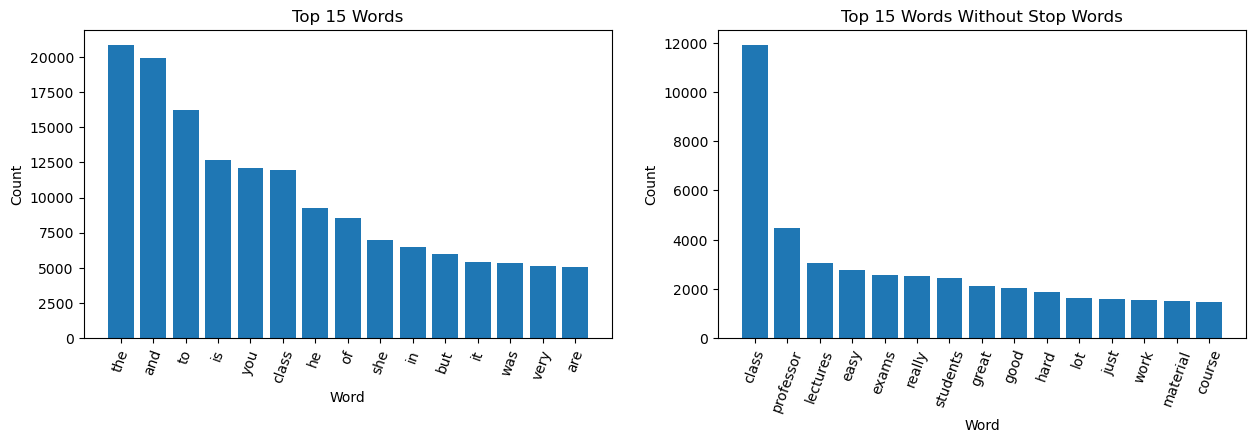

In [8]:
plt.figure(figsize=(15, 4)) 
plt.subplot(1,2,1)
plt.title("Top 15 Words")
plt.bar(top_15_all[:,0], top_15_all[:,1].astype('float64'))
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")


plt.subplot(1,2,2)
plt.title("Top 15 Words Without Stop Words")
plt.bar(top_15_all_stop[:,0], top_15_all_stop[:,1].astype('float64'))
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

In [9]:
# positive ratings 
top_15_pos = get_top_n_words(X[y], 15)
top_15_pos_stop = get_top_n_words(X[y], 15, stop_words=True)

In [10]:
# negative ratings 
top_15_neg = get_top_n_words(X[~y], 15)
top_15_neg_stop = get_top_n_words(X[~y], 15, stop_words=True)

Text(0, 0.5, 'Count')

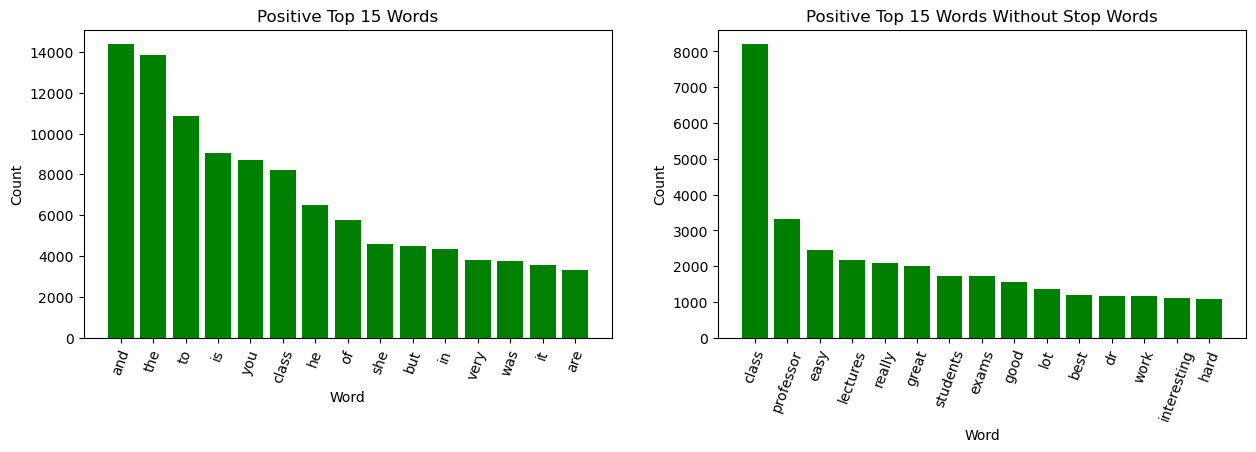

In [11]:
plt.figure(figsize=(15, 4)) 
plt.tight_layout()
plt.subplot(1,2,1)
plt.title("Positive Top 15 Words")
plt.bar(top_15_pos[:,0], top_15_pos[:,1].astype('float64'), color="g")
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.title("Positive Top 15 Words Without Stop Words")
plt.bar(top_15_pos_stop[:,0], top_15_pos_stop[:,1].astype('float64'), color="g")
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

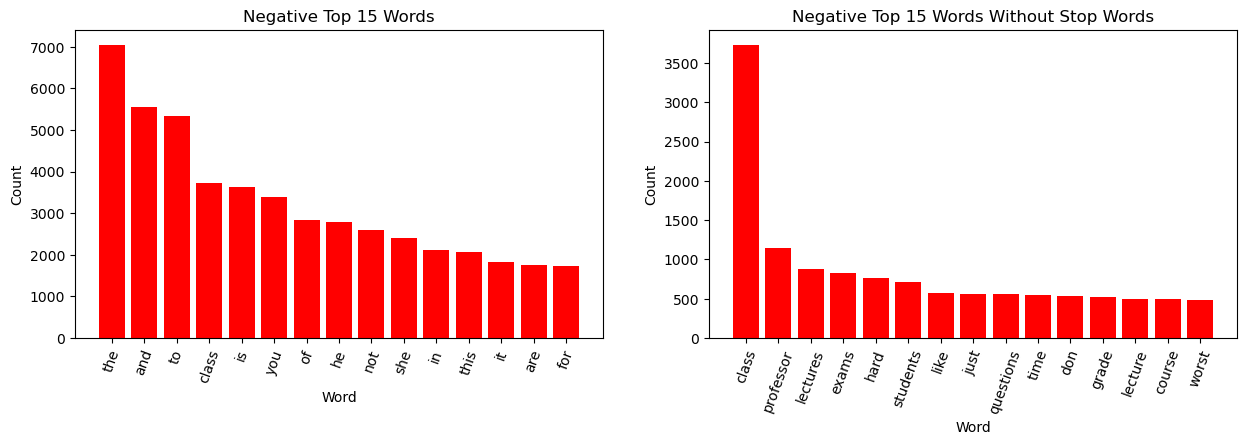

In [12]:
plt.figure(figsize=(15, 4)) 

plt.subplot(1,2,1)
plt.title("Negative Top 15 Words")
plt.bar(top_15_neg[:,0], top_15_neg[:,1].astype('float64'), color="r")
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.title("Negative Top 15 Words Without Stop Words")
plt.bar(top_15_neg_stop[:,0], top_15_neg_stop[:,1].astype('float64'), color="r")
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

## Train Test Split

In [13]:
# https://stackoverflow.com/questions/54797508/how-to-generate-a-train-test-split-based-on-a-group-id
# Train test split 70/30 based on professor id 
splitter = GroupShuffleSplit(test_size=.30, n_splits=2, random_state = 20)
split = splitter.split(ratings_csv, groups=ratings_csv['prof_id'])
train_idx, test_idx = next(split)
X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]

In [14]:
# Check that split was done properly 
print(f'Total Number of unique prof IDs: {len(pd.unique(ratings_csv["prof_id"]))}')
print(f'Number of unique prof IDs in train data: {len(pd.unique(ratings_csv.iloc[train_idx]["prof_id"]))}')
print(f'Number of unique prof IDs in test data: {len(pd.unique(ratings_csv.iloc[test_idx]["prof_id"]))}')

Total Number of unique prof IDs: 1662
Number of unique prof IDs in train data: 1163
Number of unique prof IDs in test data: 499


In [15]:
print(f"True split (based on number of ratings): {(len(X_train)/len(X))*100}% Train, {(len(X_test)/len(X))*100}% Test")

True split (based on number of ratings): 69.61006485895132% Train, 30.389935141048685% Test


## Preprocessing 

In [16]:
from preprocessing import stem_comments, top_n_stem_words
from sklearn.feature_extraction.text import TfidfTransformer,ENGLISH_STOP_WORDS 
from sklearn.pipeline import Pipeline

In [17]:
print(" ".join(ENGLISH_STOP_WORDS))

yet afterwards couldnt as hereafter eg thick was anywhere some your any around can had ever several thence to fire am there nevertheless well something since throughout we name been her sixty also many yours themselves or these everyone please meanwhile anyhow indeed through whenever now very someone latterly therefore myself whereby somewhere onto done thin therein few were own below empty other part anyone cry above sometimes who not only eleven re mine down became more front whoever whatever the found eight hasnt already towards if hereby in between find from amoungst ltd until bottom somehow etc against whereas almost most but seeming whereafter itself after under are amongst detail move when except every four via nine have nowhere then those mostly next whether latter yourself with six last than un together because never how one beside become i least anyway further thereby upon made its up get mill whose his himself being con see show herself first for serious too before may beyon

In [18]:
# (opt) Stemming 
# (opt) Stop Words 
# (opt) Ngram Tokenizing 
# (opt) Tf-IDF

In [19]:
def preprocessing(X_train, X_test, stemming=False, stop_words=False, ngram=False, tfidf=False):
    count_vec_args = {}
    if stemming == True:
        count_vec_args['tokenizer'] = stem_comments
    if stop_words == True:
        count_vec_args['stop_words'] = 'english'
    if ngram == True:
        count_vec_args['ngram_range'] = (2,2)
        
    pipeline_list = []
    pipeline_list.append(('count',CountVectorizer(**count_vec_args)))
    if tfidf == True:
        pipeline_list.append(('tfid', TfidfTransformer()))
    
    if pipeline_list == []:
        print("Empty Pipeline")
        return
    else:
        pipe = Pipeline(pipeline_list)
        print(pipe) # Print the pipeline, maybe delete this line later 
        X_train_vect = pipe.fit_transform(X_train)
        X_test_vect = pipe.transform(X_test)
        
    return X_train_vect, X_test_vect

In [20]:
# vectorizer = CountVectorizer(
#     stop_words = "english",
#     tokenizer=stem_comments,
#     ngram_range=(2,2)
# )
# tf_transform = TfidfTransformer()

In [21]:
# X_train_vect = tf_transform.fit_transform(
#     vectorizer.fit_transform(X_train)
# )

In [22]:
# X_test_vect = tf_transform.transform(
#     vectorizer.transform(X_test)
# )

## SVM

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


NOTE: now using class weighting of balanced

Old experiment code:

```
def experiment(X_train, y_train, X_test, y_test, svc = SVC(class_weight="balanced")):
    np.random.seed(12345)
    svc.fit(X_train,y_train)
    y_test_pred = svc.predict(X_test)
    print(f'Accuracy Score: {accuracy_score(y_test, y_test_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_test_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_test_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_test_pred)}')
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot()
```

In [24]:
from grid_search import experiment

### Only Stemming 

In [25]:
X_train_stem, X_test_stem = preprocessing(X_train, X_test, stemming=True)

Pipeline(steps=[('count',
                 CountVectorizer(tokenizer=<function stem_comments at 0x7f77ead7b600>))])


/home/emmaf/mambaforge/envs/RMP-sentiment/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Params" {'C': 10}
              precision    recall  f1-score   support

       False       0.48      0.65      0.55      1218
        True       0.81      0.68      0.74      2671

    accuracy                           0.67      3889
   macro avg       0.65      0.67      0.65      3889
weighted avg       0.71      0.67      0.68      3889



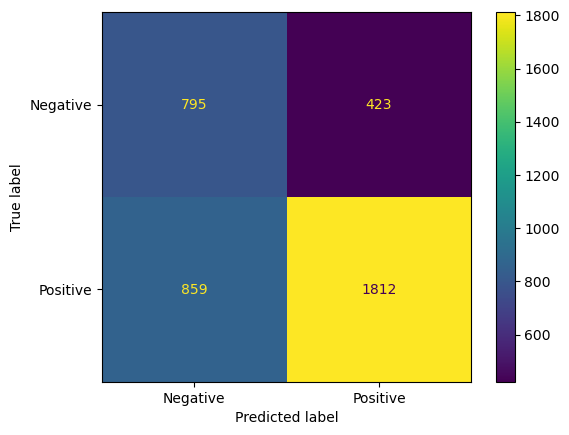

In [26]:
experiment(X_train_stem, y_train, X_test_stem, y_test)

### Only stop words 

In [27]:
X_train_stop, X_test_stop = preprocessing(X_train, X_test, stop_words=True)

Pipeline(steps=[('count', CountVectorizer(stop_words='english'))])


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Params" {'C': 10}
              precision    recall  f1-score   support

       False       0.79      0.76      0.78      1218
        True       0.89      0.91      0.90      2671

    accuracy                           0.86      3889
   macro avg       0.84      0.83      0.84      3889
weighted avg       0.86      0.86      0.86      3889



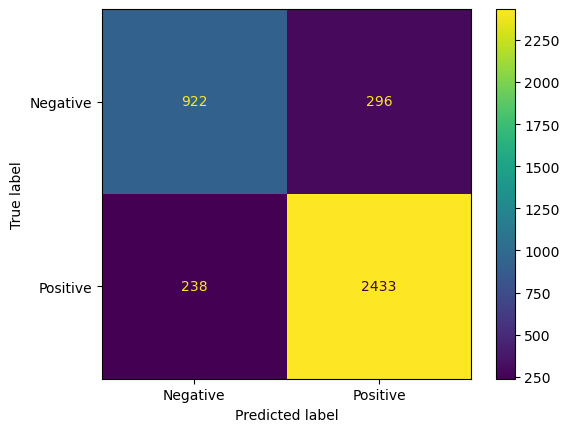

In [28]:
experiment(X_train_stop, y_train, X_test_stop, y_test)

### Only ngram tokenizing

In [29]:
X_train_ngram, X_test_ngram = preprocessing(X_train, X_test, stop_words=True)

Pipeline(steps=[('count', CountVectorizer(stop_words='english'))])


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Params" {'C': 10}
              precision    recall  f1-score   support

       False       0.79      0.76      0.78      1218
        True       0.89      0.91      0.90      2671

    accuracy                           0.86      3889
   macro avg       0.84      0.83      0.84      3889
weighted avg       0.86      0.86      0.86      3889



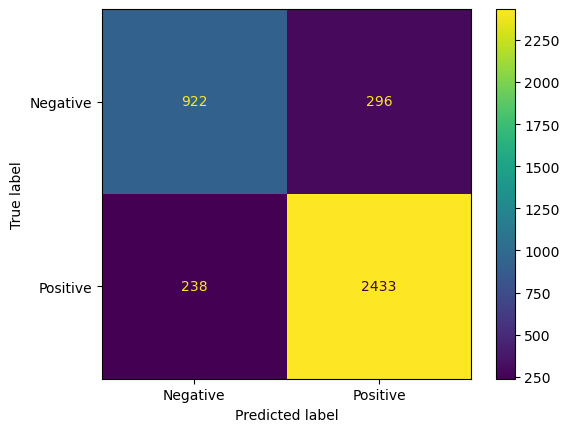

In [30]:
experiment(X_train_ngram, y_train, X_test_ngram, y_test)

### Only tfidf

In [31]:
X_train_tfidf, X_test_tfidf = preprocessing(X_train, X_test, tfidf=True)

Pipeline(steps=[('count', CountVectorizer()), ('tfid', TfidfTransformer())])


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Params" {'C': 1}
              precision    recall  f1-score   support

       False       0.81      0.86      0.84      1218
        True       0.94      0.91      0.92      2671

    accuracy                           0.89      3889
   macro avg       0.87      0.89      0.88      3889
weighted avg       0.90      0.89      0.90      3889



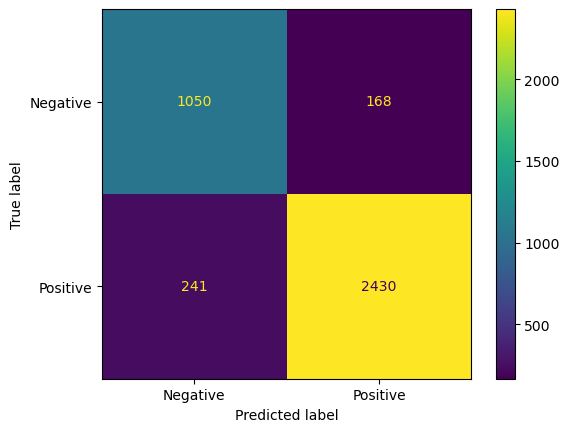

In [32]:
experiment(X_train_tfidf, y_train, X_test_tfidf, y_test)

## Trying Different Preprocessing Combinations 

In [33]:
from itertools import combinations

In [34]:
# List of preprocessing steps
techniques = ['stemming', 'stop_words', 'ngram', 'tfidf']

# Generate all combinations (besides combinations of length 1)
all_combinations = []
for r in range(2, len(techniques) + 1):
    all_combinations.extend(combinations(techniques, r))

# Make into list of dictionaries for use as arguments in the preprocessing function 
arg_list = []
for combo in all_combinations:
    arg_list.append(dict([(key, True) for key in combo]))
    

In [35]:
X_train

0        Prof. Sagan is a nice, caring man, but he is n...
1                               AWESOME PROFESSOR!!!!!!!!!
2        Professor Sagan is really good math teacher.  ...
3        Excellent professor that was very clear in tea...
4        Awesome - made me want to become a Math major ...
                               ...                        
13095    Never met someone who was as rude or as angry ...
13096    Straight up says racist and inappropriate thin...
13097    He uploads every lecture and the presentations...
13098    Very stubborn and expects too much from an int...
13099    This semester is his first time teaching ADV20...
Name: comments, Length: 8908, dtype: object

combinations: 11
Pipeline(steps=[('count',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<function stem_comments at 0x7f77ead7b600>))])


/home/emmaf/mambaforge/envs/RMP-sentiment/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/emmaf/mambaforge/envs/RMP-sentiment/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


Preprocessing Combination: stemming, stop_words
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Params" {'C': 100}
              precision    recall  f1-score   support

       False       0.47      0.61      0.53      1218
        True       0.80      0.69      0.74      2671

    accuracy                           0.67      3889
   macro avg       0.63      0.65      0.64      3889
weighted avg       0.69      0.67      0.67      3889



Pipeline(steps=[('count',
                 CountVectorizer(ngram_range=(2, 2),
                                 tokenizer=<function stem_comments at 0x7f77ead7b600>))])


/home/emmaf/mambaforge/envs/RMP-sentiment/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Preprocessing Combination: stemming, ngram
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Params" {'C': 10}
              precision    recall  f1-score   support

       False       0.72      0.72      0.72      1218
        True       0.87      0.87      0.87      2671

    accuracy                           0.82      3889
   macro avg       0.79      0.80      0.80      3889
weighted avg       0.82      0.82      0.82      3889



Pipeline(steps=[('count',
                 CountVectorizer(tokenizer=<function stem_comments at 0x7f77ead7b600>)),
                ('tfid', TfidfTransformer())])


/home/emmaf/mambaforge/envs/RMP-sentiment/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Preprocessing Combination: stemming, tfidf
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Params" {'C': 10}
              precision    recall  f1-score   support

       False       0.48      0.64      0.55      1218
        True       0.81      0.69      0.74      2671

    accuracy                           0.67      3889
   macro avg       0.65      0.66      0.65      3889
weighted avg       0.71      0.67      0.68      3889



Pipeline(steps=[('count',
                 CountVectorizer(ngram_range=(2, 2), stop_words='english'))])
Preprocessing Combination: stop_words, ngram
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Params" {'C': 1}
              precision    recall  f1-score   support

       False       0.70      0.75      0.72      1218
        True       0.88      0.85      0.87      2671

    accuracy                           0.82      3889
   macro avg       0.79      0.80      0.79      3889
weighted avg       0.82      0.82      0.8

/home/emmaf/mambaforge/envs/RMP-sentiment/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/emmaf/mambaforge/envs/RMP-sentiment/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


Preprocessing Combination: stemming, stop_words, ngram
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Params" {'C': 10}
              precision    recall  f1-score   support

       False       0.71      0.72      0.71      1218
        True       0.87      0.86      0.87      2671

    accuracy                           0.82      3889
   macro avg       0.79      0.79      0.79      3889
weighted avg       0.82      0.82      0.82      3889



Pipeline(steps=[('count',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<function stem_comments at 0x7f77ead7b600>)),
                ('tfid', TfidfTransformer())])


/home/emmaf/mambaforge/envs/RMP-sentiment/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/emmaf/mambaforge/envs/RMP-sentiment/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


Preprocessing Combination: stemming, stop_words, tfidf
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Params" {'C': 10}
              precision    recall  f1-score   support

       False       0.48      0.61      0.54      1218
        True       0.80      0.70      0.75      2671

    accuracy                           0.67      3889
   macro avg       0.64      0.66      0.64      3889
weighted avg       0.70      0.67      0.68      3889



Pipeline(steps=[('count',
                 CountVectorizer(ngram_range=(2, 2),
                                 tokenizer=<function stem_comments at 0x7f77ead7b600>)),
                ('tfid', TfidfTransformer())])


/home/emmaf/mambaforge/envs/RMP-sentiment/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Preprocessing Combination: stemming, ngram, tfidf
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Params" {'C': 10}
              precision    recall  f1-score   support

       False       0.77      0.70      0.73      1218
        True       0.87      0.90      0.89      2671

    accuracy                           0.84      3889
   macro avg       0.82      0.80      0.81      3889
weighted avg       0.84      0.84      0.84      3889



Pipeline(steps=[('count',
                 CountVectorizer(ngram_range=(2, 2), stop_words='english')),
                ('tfid', TfidfTransformer())])
Preprocessing Combination: stop_words, ngram, tfidf
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Params" {'C': 1}
              precision    recall  f1-score   support

       False       0.80      0.54      0.65      1218
        True       0.82      0.94      0.87      2671

    accuracy                           0.81      3889
   macro avg       0.81      0.74   

/home/emmaf/mambaforge/envs/RMP-sentiment/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/emmaf/mambaforge/envs/RMP-sentiment/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


Preprocessing Combination: stemming, stop_words, ngram, tfidf
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Params" {'C': 10}
              precision    recall  f1-score   support

       False       0.74      0.70      0.72      1218
        True       0.87      0.89      0.88      2671

    accuracy                           0.83      3889
   macro avg       0.80      0.79      0.80      3889
weighted avg       0.83      0.83      0.83      3889





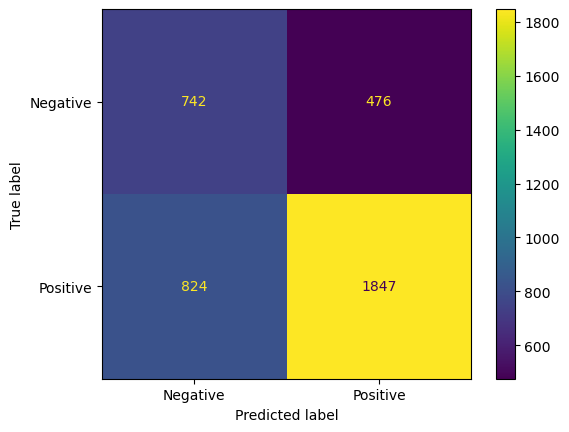

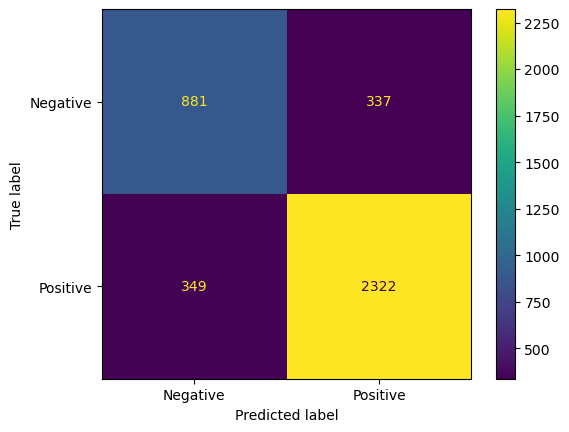

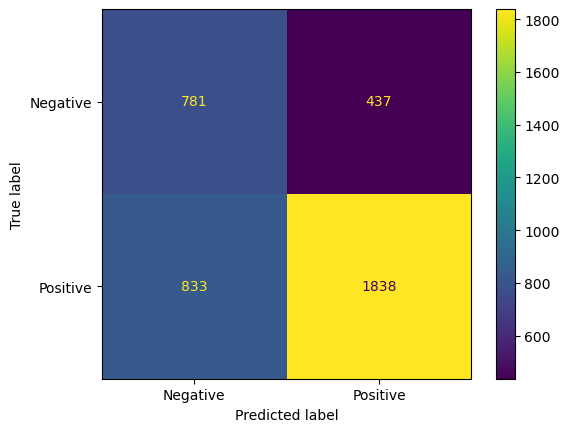

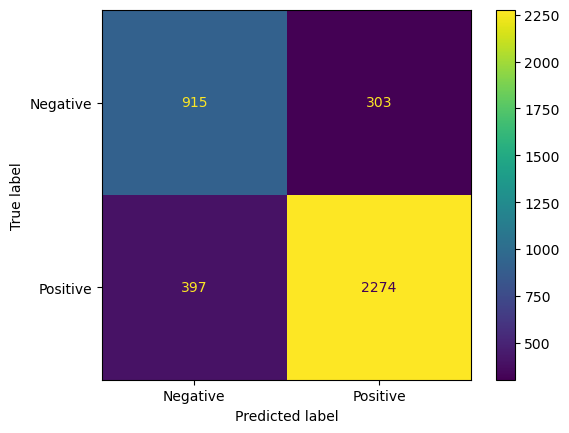

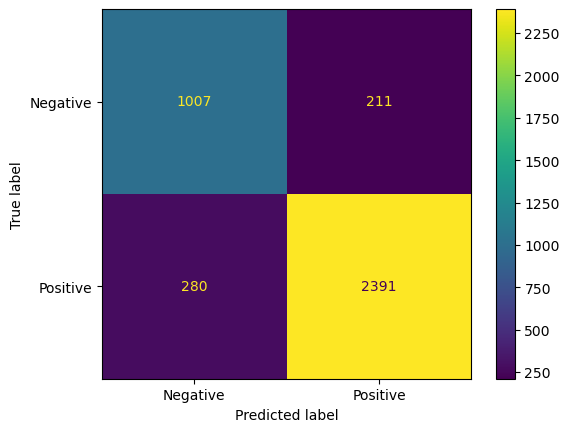

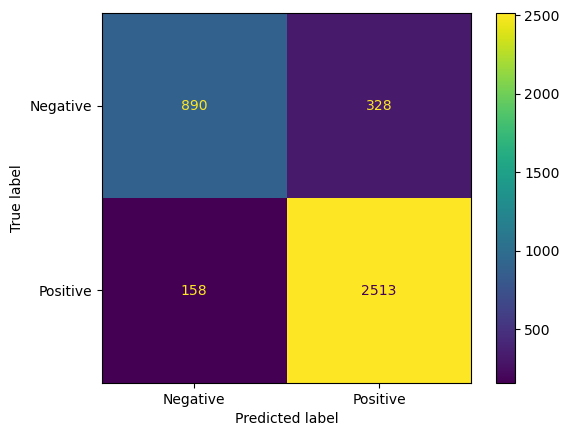

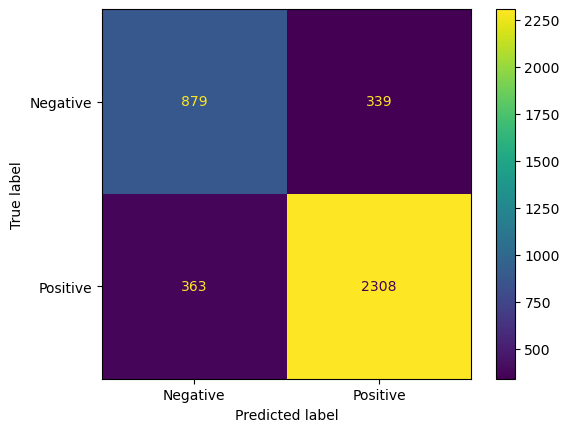

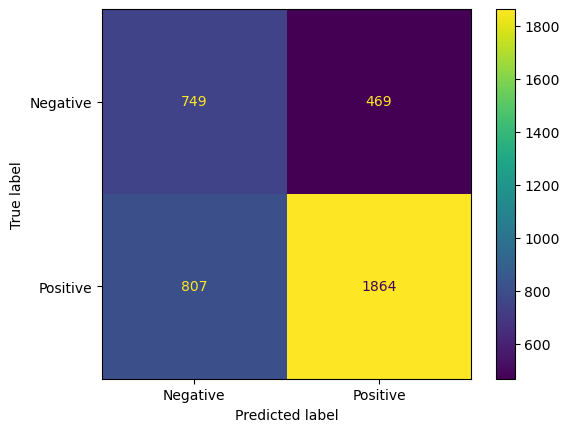

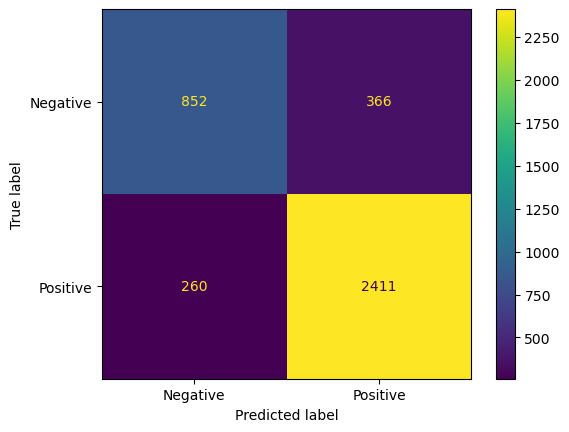

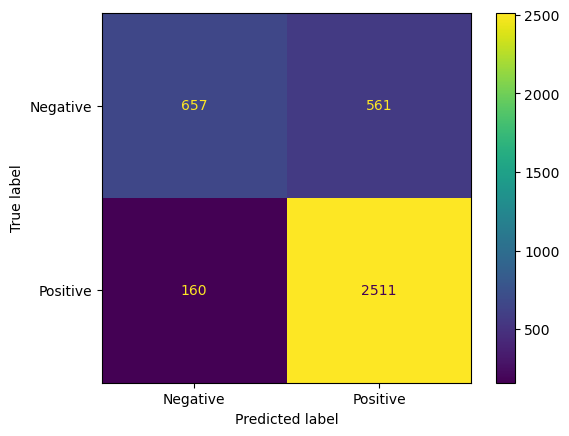

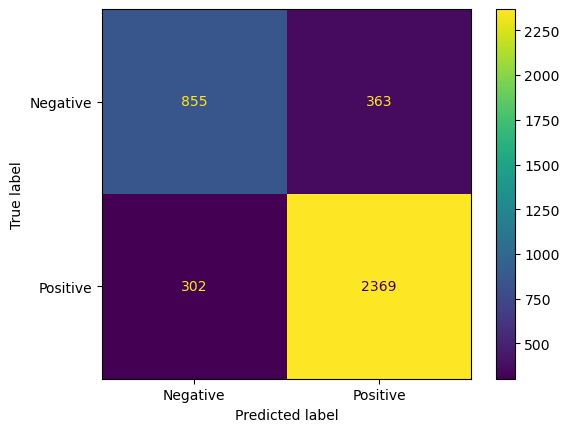

In [36]:
# Try the experiment with all combinations 
param_grid = {
    "C": [0.1, 1, 10, 100, 1e3, 1e4]
}

print(f"combinations: {len(arg_list)}")
for i in range(len(arg_list)):
    X_train_vect, X_test_vect = preprocessing(X_train, X_test, **arg_list[i])
    print('Preprocessing Combination: '+', '.join(all_combinations[i]))
    experiment(X_train_vect, y_train, X_test_vect, y_test, param_grid=param_grid, cv=3)
    print("\n")

In [37]:
svc = SVC()

In [38]:
svc.fit(X_train_vect,y_train)

SVC()

In [39]:
y_test_pred = svc.predict(X_test_vect)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
print(f'Accuracy Score: {accuracy_score(y_test, y_test_pred)}')
print(f'Precision Score: {precision_score(y_test, y_test_pred)}')
print(f'Recall Score: {recall_score(y_test, y_test_pred)}')
print(f'F1 Score: {f1_score(y_test, y_test_pred)}')

Accuracy Score: 0.8302905631267679
Precision Score: 0.853178784685634
Recall Score: 0.9093972295020591
F1 Score: 0.8803914461761508


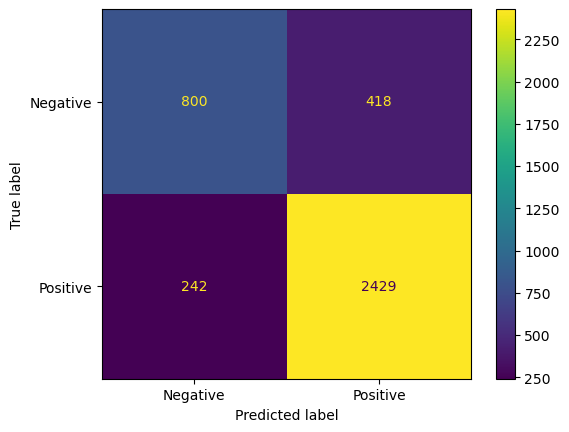

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()